# Getting al output CSV files from scripts
- Putting all CSV files togetherto perform visualizations

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to merge CSV files in a directory
def merge_csv_files(folder_path):
    all_csv_data = pd.DataFrame()
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            csv_data = pd.read_csv(os.path.join(folder_path, filename))
            all_csv_data = pd.concat([all_csv_data, csv_data], ignore_index=True)
    return all_csv_data

# Path to the main directory
main_directory = "All_outputs/"

# Creating empty dataframe
Final_DF_All_SSPs_All_Crossings_All_Countries = pd.DataFrame()

# Loop through each country folder
for country_folder in os.listdir(main_directory):
    country_folder_path = os.path.join(main_directory, country_folder)
    if os.path.isdir(country_folder_path):
        # Merge CSV files in the country folder
        country_data = merge_csv_files(country_folder_path)
        if not country_data.empty:
            # Add country abbreviation column
            country_data['Country'] = country_folder
            # Append country data to the main DataFrame
            Final_DF_All_SSPs_All_Crossings_All_Countries = pd.concat([Final_DF_All_SSPs_All_Crossings_All_Countries, country_data], ignore_index=True)

# Define the file path
file_path = "Script_Output_Graphs_Dataframes/Final_DF_All_SSPs_All_Crossings_All_Countries.csv"
Final_DF_All_SSPs_All_Crossings_All_Countries.to_csv(file_path, index=False)

Final_DF_All_SSPs_All_Crossings_All_Countries.head()


FileNotFoundError: [Errno 2] No such file or directory: 'All_outputs/'

In [9]:
# Rename 'El_Salvador' to 'El Salvador' in the DataFrame
Final_DF_All_SSPs_All_Crossings_All_Countries['Country'] = Final_DF_All_SSPs_All_Crossings_All_Countries['Country'].replace({'El_Salvador': 'El Salvador'})

# Define the country codes
country_codes = {
    'Mexico': 'MEX',
    'El Salvador': 'ELSAL',
    'Honduras': 'HON',
    'Guatemala': 'GUA'
}

# Insert the 'Country_Code' column after 'Country'
column_index = Final_DF_All_SSPs_All_Crossings_All_Countries.columns.get_loc('Country') + 1
Final_DF_All_SSPs_All_Crossings_All_Countries.insert(column_index, 'Country_Code', Final_DF_All_SSPs_All_Crossings_All_Countries['Country'].map(country_codes))
# Final_DF_All_SSPs_All_Crossings_All_Countries


# Final Graph: Num. 1
- SSP Scenarios per Crossing
- Sum of each Country

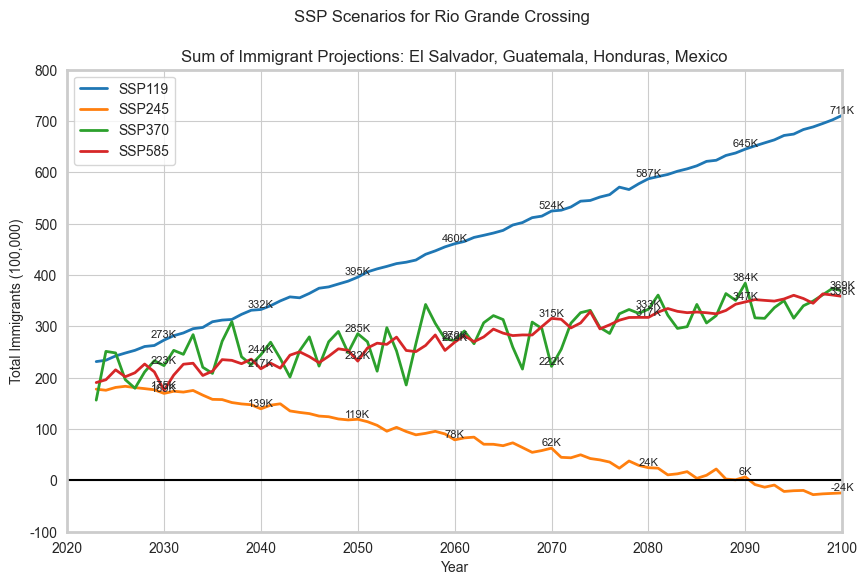

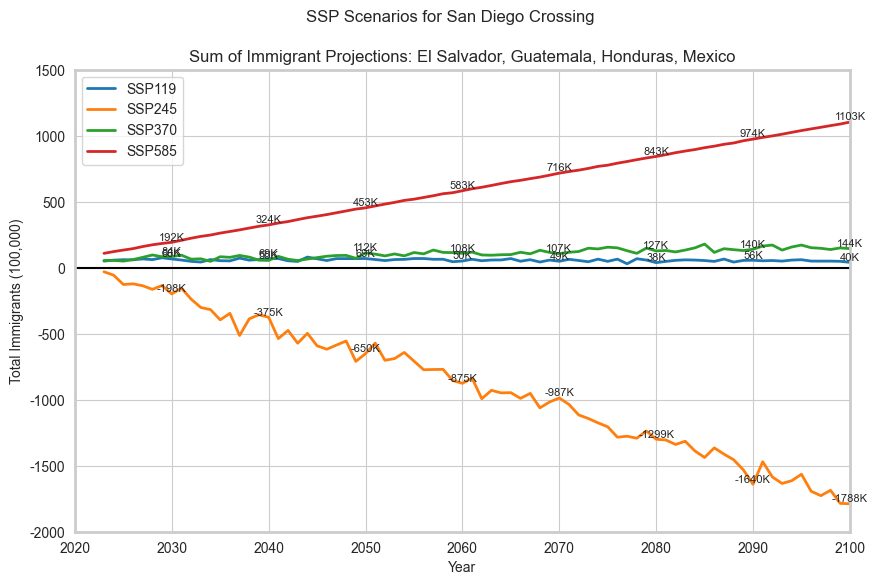

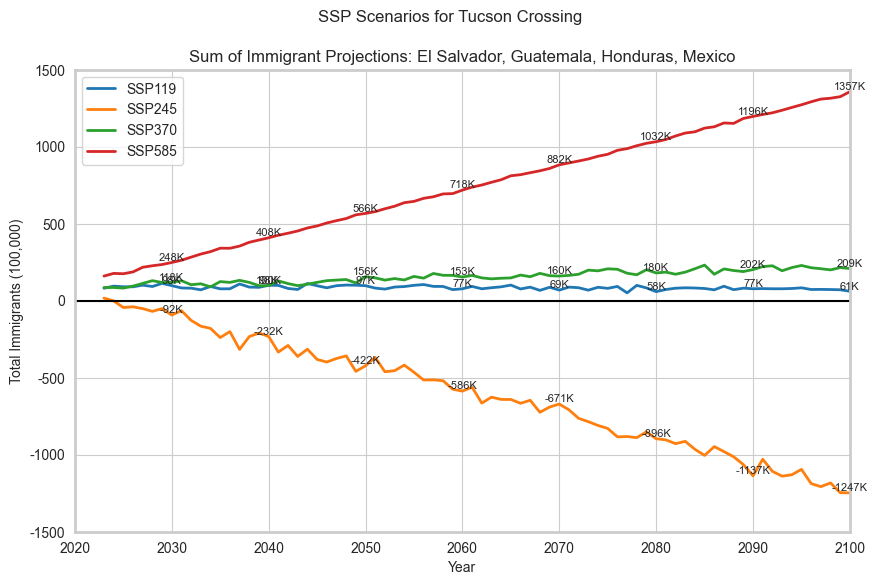

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette
sns.set_style("whitegrid")
custom_palette = {'SSP119': '#1f77b4', 'SSP245': '#ff7f0e', 'SSP370': '#2ca02c', 'SSP585': '#d62728'}

# Melt the DataFrame if necessary
melted_df = Final_DF_All_SSPs_All_Crossings_All_Countries.melt(
    id_vars=['Scenario', 'Crossing', 'Country', 'Country_Code'], 
    var_name='Year', 
    value_name='Total'
)

# Convert 'Year' column to integers
melted_df['Year'] = melted_df['Year'].astype(int)

# Plotting
# Define the scenarios to plot
scenarios = ['SSP119', 'SSP245', 'SSP370', 'SSP585']

# Define the unique crossings
unique_crossings = melted_df['Crossing'].unique()

# Determine the range of years present in the data
years_present = sorted(melted_df['Year'].unique())

# Determine the x-axis ticks to display every 10 years
x_ticks = list(range(2020, 2101, 10))

# Plot for each unique crossing
for crossing in unique_crossings:
    # Create a new plot for each crossing
    plt.figure(figsize=(10, 6))
    
    for scenario in scenarios:
        # Filter the data for the current crossing and scenario
        filtered_data = melted_df[(melted_df['Crossing'] == crossing) & (melted_df['Scenario'] == scenario)]
        
        # Filter the data for the specified countries
        countries_to_plot = ['Honduras', 'Guatemala', 'El Salvador', 'Mexico']
        filtered_data = filtered_data[filtered_data['Country'].isin(countries_to_plot)]
        
        # Group the data by year and calculate the total sum
        grouped_data = filtered_data.groupby('Year')['Total'].sum().reset_index()
        
        # Plot the data with thicker lines
        plt.plot(grouped_data['Year'], grouped_data['Total'], label=f'{scenario}', color=custom_palette[scenario], linewidth=2)
        
        # Annotate the points with the total number of immigrants
        for x, y in zip(grouped_data['Year'], grouped_data['Total']):
            if x in range(2020, 2101, 10):
                plt.text(x, y, f'{int(y/1000)}K', ha='center', va='bottom', fontsize=8)
    
    # Replace underscores with spaces in the crossing name
    crossing_name = crossing.replace('_', ' ')
    
    # Add labels and title for the plot
    plt.xlabel('Year')
    plt.ylabel('Total Immigrants (100,000)')
    
    plt.title(f'Sum of Immigrant Projections: El Salvador, Guatemala, Honduras, Mexico')
    plt.suptitle(f'SSP Scenarios for {crossing_name}')
    
    # Set Y axis to display in thousands
    plt.ticklabel_format(style='plain', axis='y', useOffset=False, scilimits=(0,0))
    plt.yticks(plt.yticks()[0], [int(y/1000) for y in plt.yticks()[0]])
    
    # Set X axis limits and ticks
    plt.xlim(2020, 2100)
    plt.xticks(x_ticks)
    
    # Show legend
    plt.legend()
    
    # Add a thick border to the graph
    plt.gca().spines['top'].set_linewidth(2)
    plt.gca().spines['right'].set_linewidth(2)
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)
    
    # Add horizontal line at y=0
    plt.axhline(0, color='black', linestyle='-', linewidth=1.5)
    
    # Define the folder path
    folder_path = "Script_Output_Graphs_Dataframes/Crawler_Output_Graphs"

    # Save the plot
    plt.savefig(f"{folder_path}/plot_{crossing_name}_{scenario}.png")
    
    # Show the plot
    plt.show()


# SEABORN

# 95% CONFIDENCE INTERVAL EXPLAINED:
Imagine you're trying to estimate something, like the average height of all students in a school. Now, you can't measure every single student because there might be too many. So instead, you might measure a smaller group, like a class or a grade.

Now, here's where the confidence interval comes in. Let's say you measure the height of 30 students in a class and find that the average height is 160 cm. But, you know that this average might not be exactly the same if you were to measure a different class. So, you want to give an idea of how confident you are in your estimate.

The 95% confidence interval means that if you were to repeat this process of measuring 30 students in different classes and calculating the average height many times, you would expect the true average height of all students in the school to fall within this interval about 95 out of 100 times.

In simpler terms, it's like saying, "I'm pretty sure that the true average height of all students in the school is somewhere between X and Y centimeters, based on the measurements I took from this class." It gives you a sense of how accurate or reliable your estimate is.

# Final Graph: Num. 2
- 4 Graphs: each for SSP scenario
- Each graph has total number of immigrants per country
- Confidence Interval of 95%

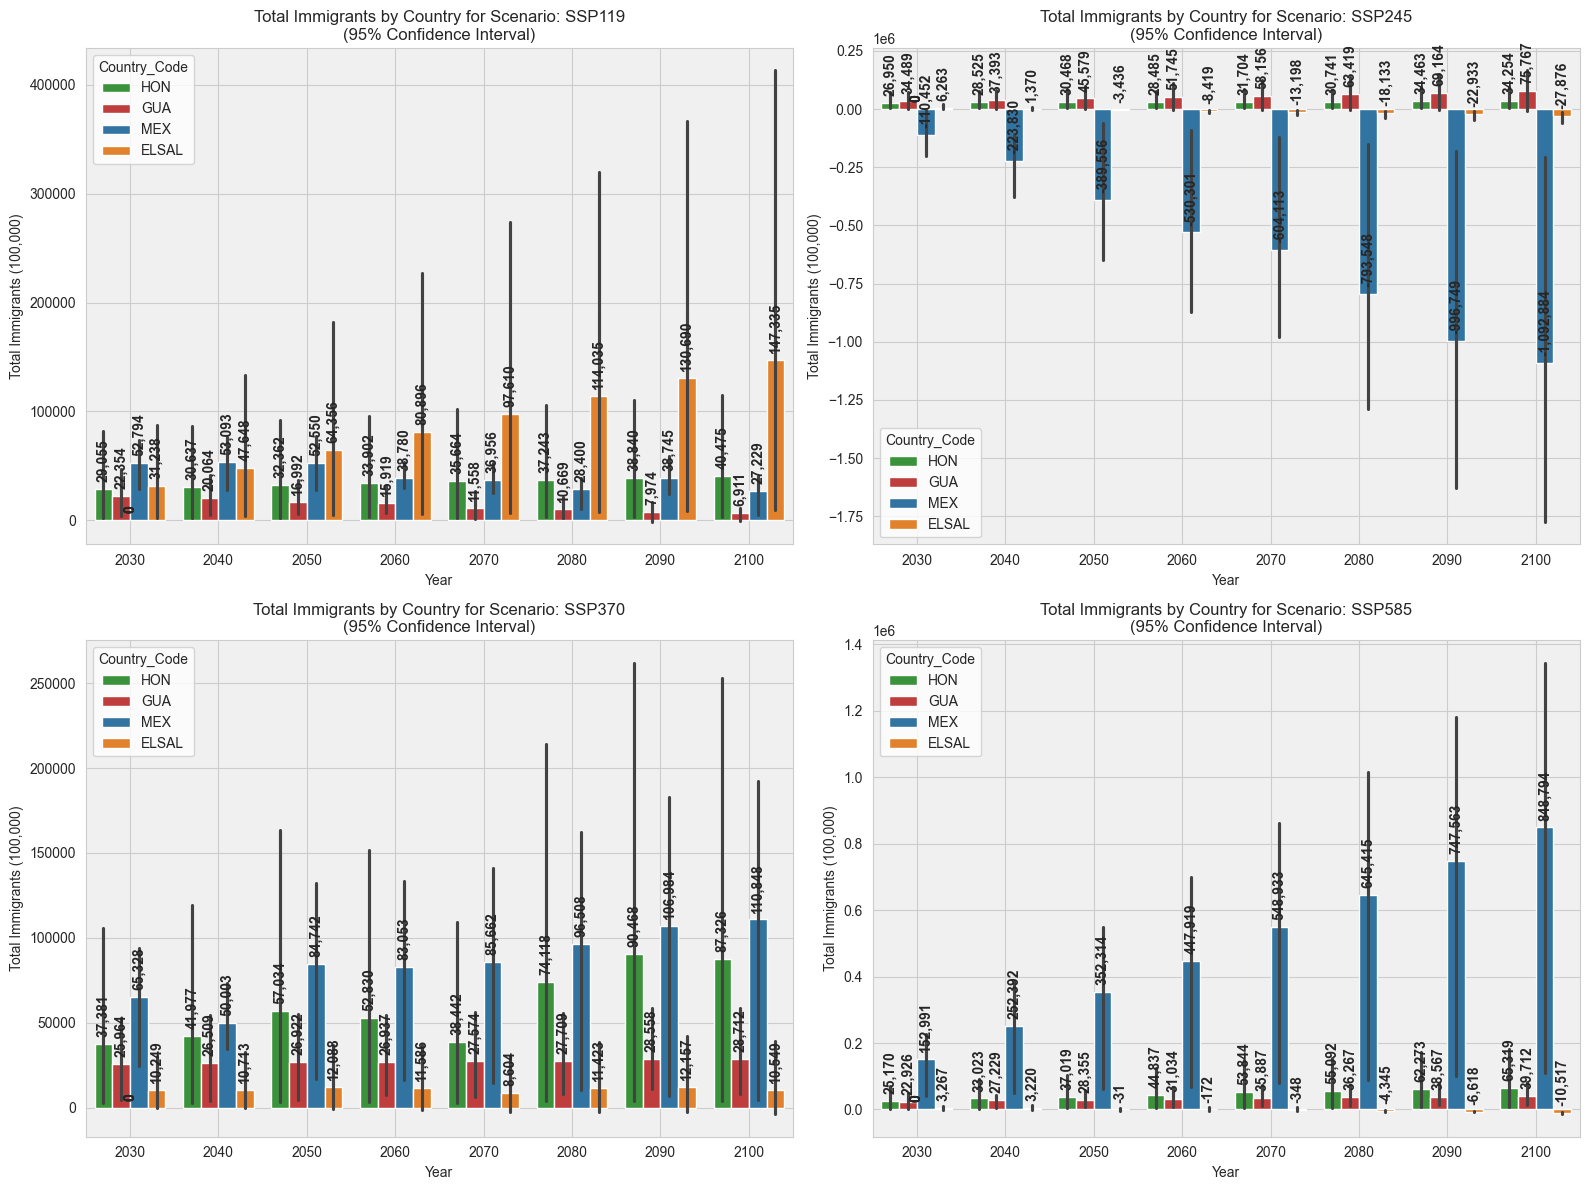

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Reshape the DataFrame using melt
melted_df = Final_DF_All_SSPs_All_Crossings_All_Countries.melt(
    id_vars=['Scenario', 'Crossing', 'Country', 'Country_Code'],
    var_name='Year',
    value_name='Total Immigrants'
)

# Convert 'Year' to datetime if necessary
melted_df['Year'] = pd.to_datetime(melted_df['Year'], format='%Y')

# Filter the data to include only every ten years or until 2100
filtered_df = melted_df[melted_df['Year'].dt.year % 10 == 0]  # Every ten years
filtered_df = filtered_df[filtered_df['Year'].dt.year <= 2100]  # Until 2100

# Create a custom color palette for countries
custom_palette = {'MEX': '#1f77b4', 'ELSAL': '#ff7f0e', 'HON': '#2ca02c', 'GUA': '#d62728'}

# Ensure all country codes are included in the palette
for code in filtered_df['Country_Code'].unique():
    if code not in custom_palette:
        custom_palette[code] = '#808080'  # Gray color for missing country codes

# Group by scenario and plot
scenarios = melted_df['Scenario'].unique()
num_scenarios = len(scenarios)

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, scenario in enumerate(scenarios):
    scenario_df = filtered_df[filtered_df['Scenario'] == scenario]
    
    # Select the current subplot
    ax = axes[i]
    
    # Use Seaborn's barplot with custom palette
    sns.barplot(data=scenario_df, x=scenario_df['Year'].dt.year, y='Total Immigrants', hue='Country_Code', palette=custom_palette, ax=ax)
    
    # Customize the plot
    ax.set_title(f'Total Immigrants by Country for Scenario: {scenario}\n(95% Confidence Interval)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Immigrants (100,000)')
    ax.grid(True)
    
    # Change background color
    ax.set_facecolor('#f0f0f0')
    
    # Annotate each bar with its corresponding value
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=90, xytext=(0, 5),
                     textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Save the plots
folder_path = "Script_Output_Graphs_Dataframes/Crawler_Output_Graphs"
plt.savefig(f"{folder_path}/immigrants_by_country_scenario.png")

# Show the plots
plt.show()


# Final Graph: Num. 3
- Total Immigrants by Crossing for each SSP: 4 graphs 
- There are 4 sets of 4 graphs each
- No Confidence Interval, just real proyected numbers

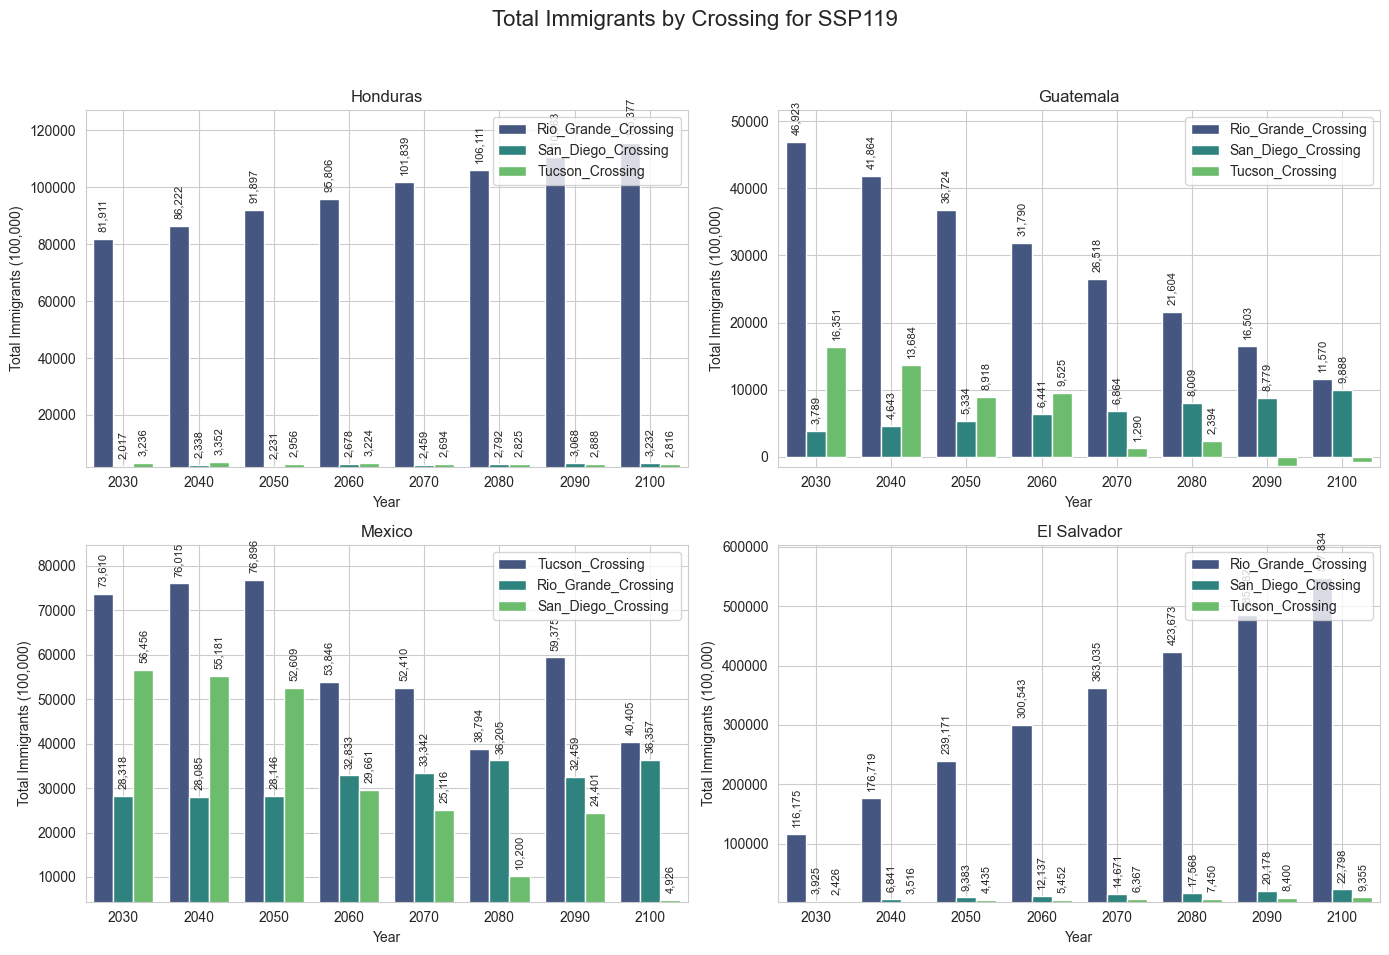

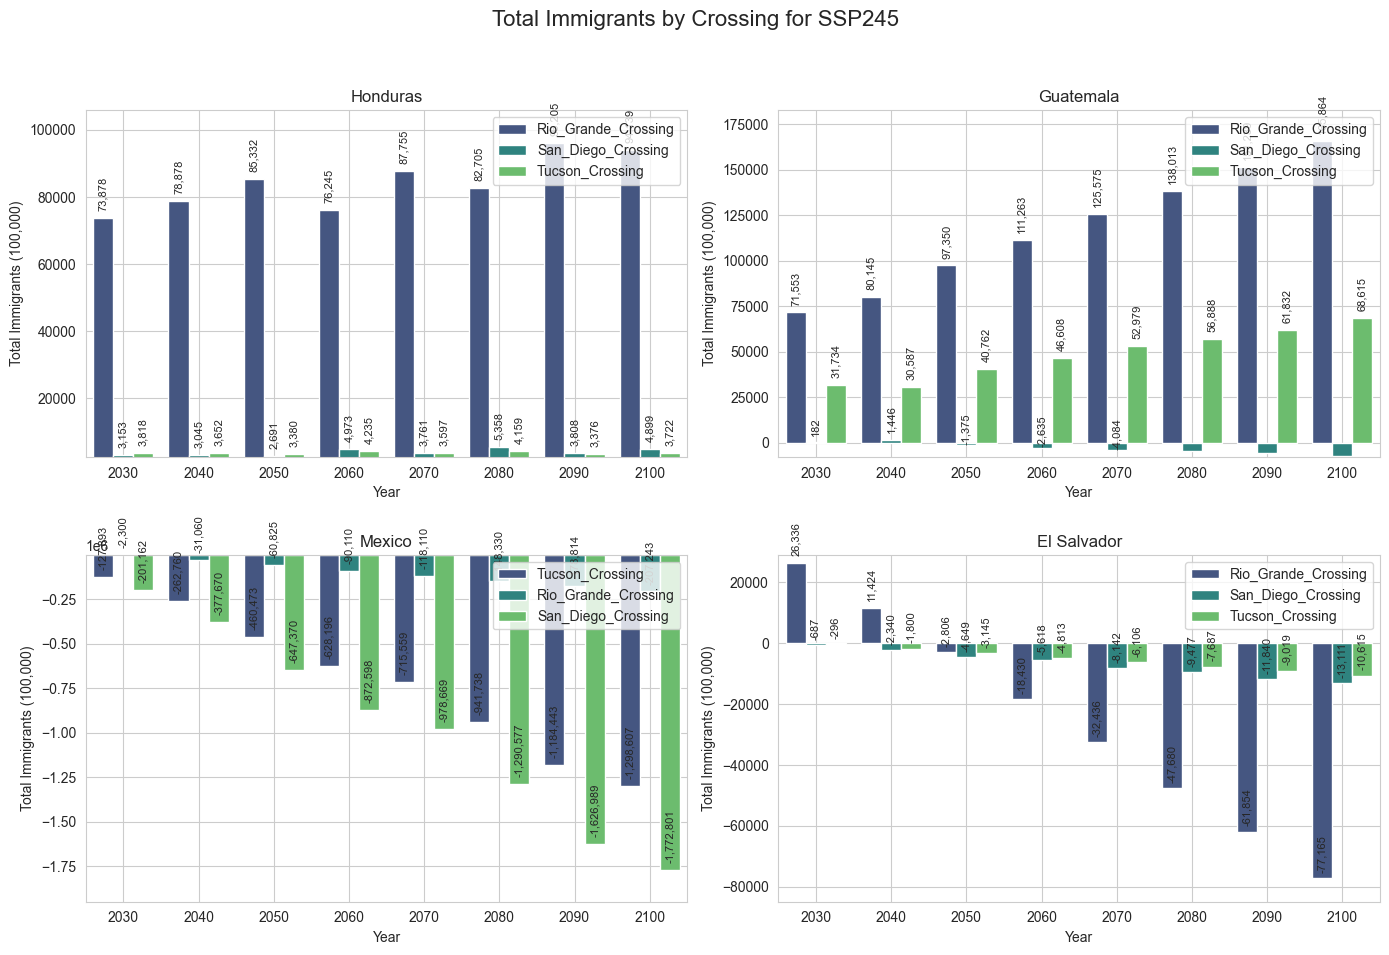

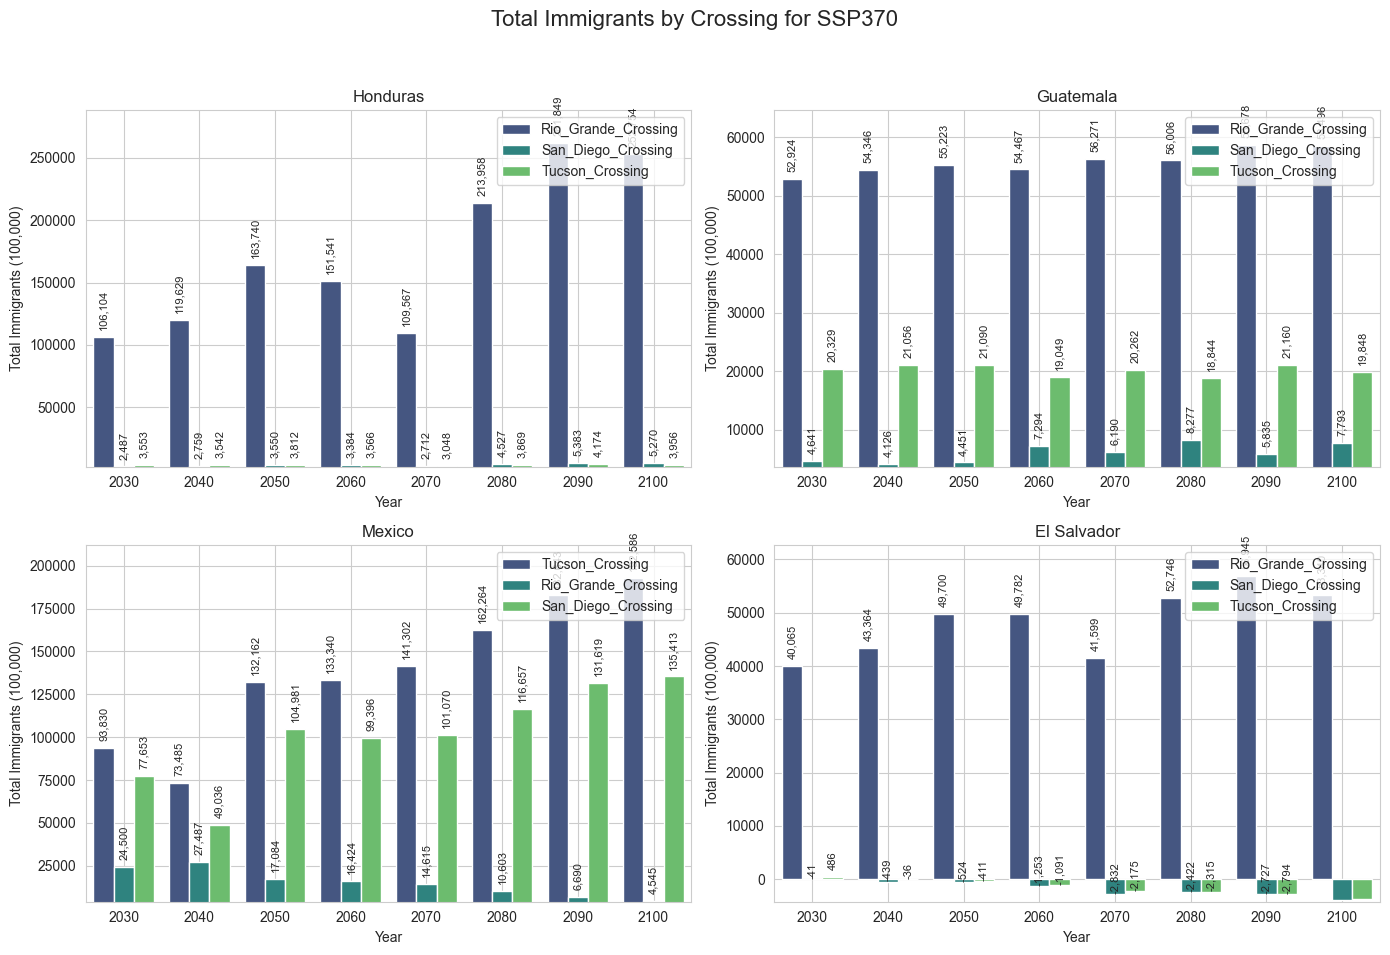

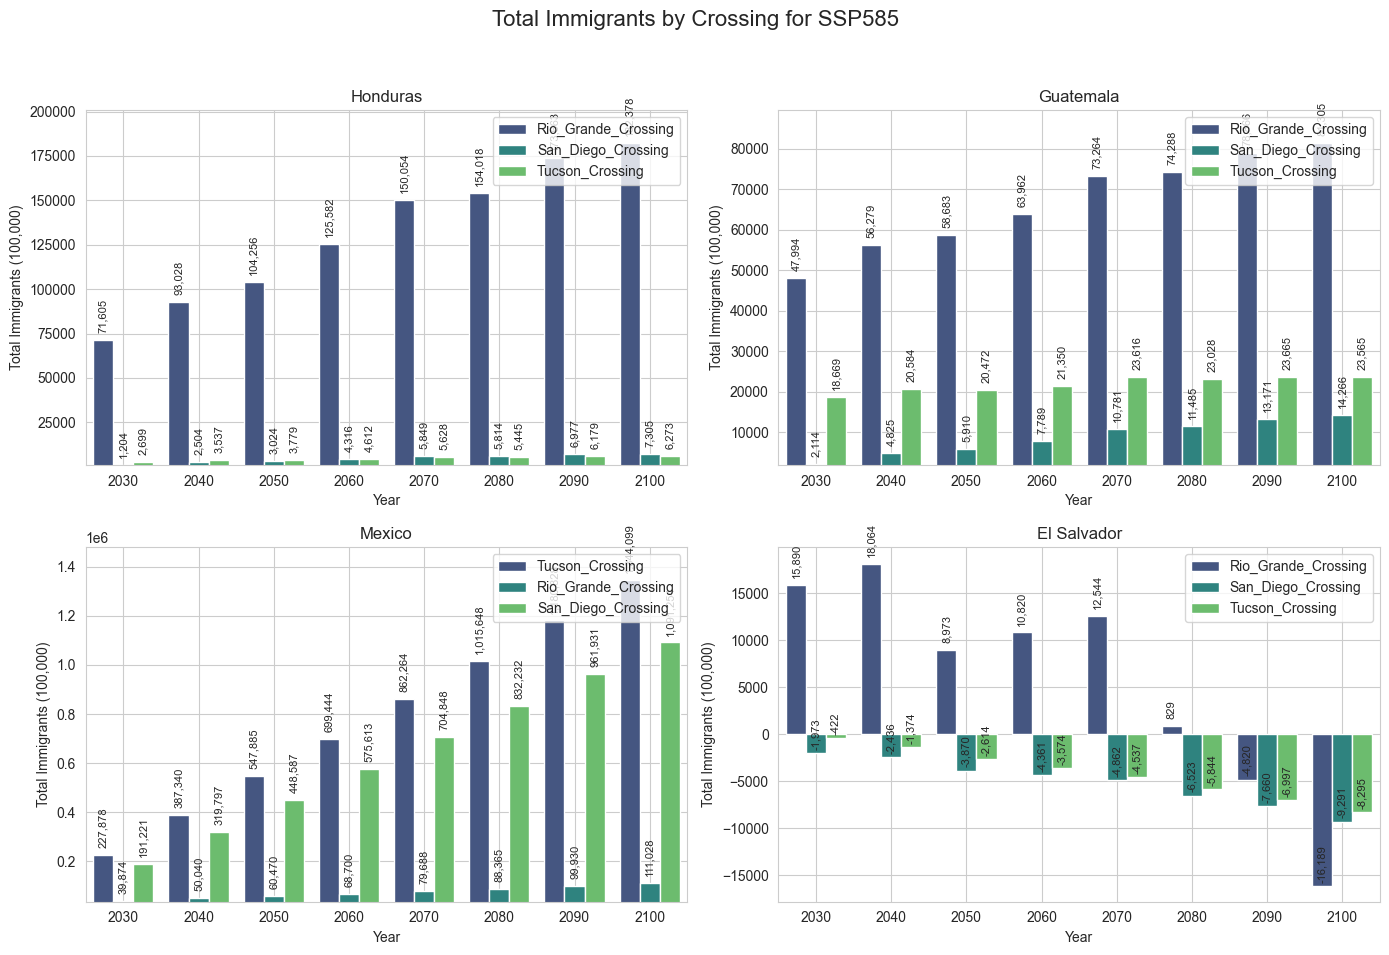

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Reshape the DataFrame using melt
melted_df = Final_DF_All_SSPs_All_Crossings_All_Countries.melt(
    id_vars=['Scenario', 'Crossing', 'Country', 'Country_Code'],
    var_name='Year',
    value_name='Total Immigrants'
)

# Convert 'Year' to datetime if necessary
melted_df['Year'] = pd.to_datetime(melted_df['Year'], format='%Y')

# Filter the data to include only every ten years or until 2100
filtered_df = melted_df[(melted_df['Year'].dt.year % 10 == 0) & (melted_df['Year'].dt.year <= 2100)]

# Filter out rows with Total Immigrants = 0 for Tucson_Crossing
filtered_df = filtered_df[~((filtered_df['Crossing'] == 'Tucson_Crossing') & (filtered_df['Total Immigrants'] == 0))]

# Group by Country, Scenario, and Crossing, then calculate the min and max Total Immigrants
min_max_values = filtered_df.groupby(['Country', 'Scenario', 'Crossing'])['Total Immigrants'].agg(['min', 'max'])

# Reset index to flatten the hierarchical index
min_max_values = min_max_values.reset_index()

# Create a custom color palette for countries
custom_palette = {'MEX': '#1f77b4', 'ELSAL': '#ff7f0e', 'HON': '#2ca02c', 'GUA': '#d62728'}

# Ensure all country codes are included in the palette
for code in filtered_df['Country_Code'].unique():
    if code not in custom_palette:
        custom_palette[code] = '#808080'  # Gray color for missing country codes

# Group by scenario and plot
for scenario in melted_df['Scenario'].unique():
    scenario_df = filtered_df[filtered_df['Scenario'] == scenario]
    
    # Create subplots for each country
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Total Immigrants by Crossing for {scenario}', fontsize=16)

    # Use Seaborn's barplot for each country
    for i, country in enumerate(melted_df['Country'].unique()):
        row = i // 2
        col = i % 2
        country_df = scenario_df[scenario_df['Country'] == country]
        ax = sns.barplot(data=country_df, x=country_df['Year'].dt.year, y='Total Immigrants', hue='Crossing', ax=axes[row, col], palette='viridis', errorbar=None)
        ax.set_title(country)
        ax.set_xlabel('Year')
        ax.set_ylabel('Total Immigrants (100,000)')
        ax.grid(True)
        ax.legend(loc='upper right')

        # Set y-axis limits based on min and max values per country, scenario, and crossing
        country_min_max = min_max_values[(min_max_values['Country'] == country) & (min_max_values['Scenario'] == scenario)]
        if not country_min_max.empty:
            min_value = country_min_max['min'].min() - 0.1 * abs(country_min_max['min'].min())  # Add space before min value
            max_value = country_min_max['max'].max() + 0.1 * abs(country_min_max['max'].max())  # Add space after max value
            ax.set_ylim(min_value, max_value)

        # Annotate each bar with the total number of immigrants
        for p in ax.patches:
            if p.get_height() != 0:  # Ensure annotation is not placed on zero bars
                if p.get_height() > 0:
                    annotation_height = p.get_height()
                else:
                    annotation_height = p.get_height() - 0.02 * abs(max_value)  # Adjust for negative bars
                ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., annotation_height),
                             ha='center', va='bottom', fontsize=8, rotation=90, xytext=(0, 5),
                             textcoords='offset points')

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save the plots
    folder_path = "Script_Output_Graphs_Dataframes/Crawler_Output_Graphs"
    plt.savefig(f"{folder_path}/immigrants_by_crossing_{scenario}.png")

    # Show the plots
    plt.show()
